### Carregamento de Bibliotecas

In [2]:
import pandas as pd
import polars as pl

### Exercício 1 — Deteção de outliers com IQR

In [3]:
# Leitura Pandas com separador ;
titanic_pandas = pd.read_csv(r'C:\Users\HP\Desktop\Formação\Eisnt\UFCD 10808 - Limpeza e transformação de dados em Python\titanic\train.csv', sep=',', na_values=["N/D", "NA"], encoding="utf-8")

#1.Carregue train.csv para um DataFrame Pandas e para um DataFrame Polars.
df_pandas = pd.DataFrame(titanic_pandas)
#print(df_pandas.head())


#função para IQR pandas
def iqr_pandas(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    return q1, q3, iqr

cols = ['Age', 'Fare', 'SibSp']

# 2.Para cada variável, calcule Q1, Q3 e IQR.
print("\nQ1, Q3 e IQR no Pandas")
for col in cols:
    q1, q3, iqr = iqr_pandas(df_pandas[col])
    print(f"Coluna: {col} | Q1: {q1} | Q3: {q3} | IQR: {iqr}")

#3.Defina limites inferior/superior = Q1 − 1,5·IQR e Q3 + 1,5·IQR.
def limites_pandas(s):
    q1, q3, iqr = iqr_pandas(s)
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit 

print("\nLimites Inferior e Superior:")
for col in cols:
    lower_limit, upper_limit = limites_pandas(df_pandas[col])
    print(f"Coluna: {col} | Limite Inferior: {lower_limit:.2f} | Limite Superior: {upper_limit:.2f}")   
    
print("\nContagem de outliers:")    
#4.Conte quantos outliers existem por variável.
for c in cols:
    lower_limit, upper_limit = limites_pandas(df_pandas[c])
    outliers = (df_pandas[c] < lower_limit) | (df_pandas[c] > upper_limit)
    n_outliers = outliers.sum()
    perc= n_outliers / len(df_pandas)
    print(f"Coluna: {c} | Número de Outliers: {n_outliers} | Percentagem: {perc:.2%}")


#5. Compare tempos de execução (use %%timeit).



Q1, Q3 e IQR no Pandas
Coluna: Age | Q1: 20.125 | Q3: 38.0 | IQR: 17.875
Coluna: Fare | Q1: 7.9104 | Q3: 31.0 | IQR: 23.0896
Coluna: SibSp | Q1: 0.0 | Q3: 1.0 | IQR: 1.0

Limites Inferior e Superior:
Coluna: Age | Limite Inferior: -6.69 | Limite Superior: 64.81
Coluna: Fare | Limite Inferior: -26.72 | Limite Superior: 65.63
Coluna: SibSp | Limite Inferior: -1.50 | Limite Superior: 2.50

Contagem de outliers:
Coluna: Age | Número de Outliers: 11 | Percentagem: 1.23%
Coluna: Fare | Número de Outliers: 116 | Percentagem: 13.02%
Coluna: SibSp | Número de Outliers: 46 | Percentagem: 5.16%


In [4]:
# Leitura Polars com separador ,
titanic_polars = pl.read_csv(r'C:\Users\HP\Desktop\Formação\Eisnt\UFCD 10808 - Limpeza e transformação de dados em Python\titanic\train.csv', separator=',',  null_values=["N/D", "NA"], encoding="utf-8")

#1.Carregue train.csv para um DataFrame Pandas e para um DataFrame Polars.
df_polars = pl.DataFrame(titanic_polars)

#print(df_polars.head())

#função para IQR pandas
def iqr_polars(s):
    q1= df_polars.select(pl.col(s)).quantile(0.25,"nearest").item()
    q3= df_polars.select(pl.col(s)).quantile(0.75,"nearest").item()
    iqr = q3 - q1
    return q1, q3, iqr

cols = ['Age', 'Fare', 'SibSp']

# 2.Para cada variável, calcule Q1, Q3 e IQR.
print("\nQ1, Q3 e IQR no Polars")
for col in cols:
    q1, q3, iqr = iqr_polars(col)
    print(f"Coluna: {col} | Q1: {q1} | Q3: {q3} | IQR: {iqr}")
    
#3.Defina limites inferior/superior = Q1 − 1,5·IQR e Q3 + 1,5·IQR.
def limites_polars(s):
    q1, q3, iqr = iqr_polars(s)
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

print("\nLimites Inferior e Superior:")
for col in cols:
    lower_limit, upper_limit = limites_polars(col)
    print(f"Coluna: {col} | Limite Inferior: {lower_limit:.2f} | Limite Superior: {upper_limit:.2f}")   


#4.Conte quantos outliers existem por variável.
print("\nContagem de outliers:")

for c in cols:
    lower_limit, upper_limit = limites_polars(c)
    outliers = df_polars.filter((pl.col(c) < lower_limit) | (pl.col(c) > upper_limit)) 
    n_outliers = outliers.height
    print(f"Coluna: {c} | Número de Outliers: {n_outliers} ")
    
    


Q1, Q3 e IQR no Polars
Coluna: Age | Q1: 20.0 | Q3: 38.0 | IQR: 18.0
Coluna: Fare | Q1: 7.925 | Q3: 31.0 | IQR: 23.075
Coluna: SibSp | Q1: 0.0 | Q3: 1.0 | IQR: 1.0

Limites Inferior e Superior:
Coluna: Age | Limite Inferior: -7.00 | Limite Superior: 65.00
Coluna: Fare | Limite Inferior: -26.69 | Limite Superior: 65.61
Coluna: SibSp | Limite Inferior: -1.50 | Limite Superior: 2.50

Contagem de outliers:
Coluna: Age | Número de Outliers: 8 
Coluna: Fare | Número de Outliers: 116 
Coluna: SibSp | Número de Outliers: 46 


### Exercício 2 — Capping de valores extremos

In [5]:
#1 - Ler Dataset
df_exam = pd.read_csv(r'C:\Users\HP\Desktop\Formação\Eisnt\UFCD 10808 - Limpeza e transformação de dados em Python\StudentsPerformance.csv', sep=',', na_values=["N/D", "NA"], encoding="utf-8")
#print(df_exam.head())

# 2 - Explorar distribuição inicial
print("\nDistribuição inicial:")
num_cols =['math score', 'reading score', 'writing score']
print(df_exam[num_cols].describe().loc[['mean', 'min', 'max']])

# 3 - Calcular p5/p95 e aplicar capping
print("\nCapping:")
for col in num_cols:
    p5 = df_exam[col].quantile(0.05)
    p95 = df_exam[col].quantile(0.95)
    df_exam[col + "_raw"] = df_exam[col] #guardar os valores originais
    print(f"Coluna: {col} | P5: {p5:.2f} | P95: {p95:.2f}")
    df_exam[col] = df_exam[col].clip(p5, p95)   
    #print(f"Coluna: {col} | Média: {df_exam[col].mean():.2f} | Mínimo: {df_exam[col].min():.2f} | Máximo: {df_exam[col].max():.2f}")
    
# 4 - Avaliar impacto do capping
before = df_exam[[col + "_raw" for col in num_cols]].describe().loc[['mean', 'std']]
after = df_exam[num_cols].describe().loc[['mean', 'std']]
print("\nImpacto do capping:")
print(before.join(after, lsuffix='_before', rsuffix='_after'))


Distribuição inicial:
      math score  reading score  writing score
mean      66.089         69.169         68.054
min        0.000         17.000         10.000
max      100.000        100.000        100.000

Capping:
Coluna: math score | P5: 40.95 | P95: 90.05
Coluna: reading score | P5: 44.00 | P95: 92.00
Coluna: writing score | P5: 42.95 | P95: 92.00

Impacto do capping:
      math score_raw  reading score_raw  writing score_raw  math score  \
mean        66.08900          69.169000          68.054000   66.256000   
std         15.16308          14.600192          15.195657   13.721589   

      reading score  writing score  
mean      69.273000      68.218500  
std       13.399628      13.919272  


### Exercício 3 — Duplicados & valores nulos

In [6]:

#1. Verifique duplicados completos 
print("Duplicados completos: ", titanic_pandas.duplicated().sum())

#2.Remova-os
dups = titanic_pandas.duplicated().sum()
print(f"\nNúmero de duplicados: {dups}")
titanic_pandas = titanic_pandas.drop_duplicates()

#3.Impute Age com a mediana por Pclass.
print("\nImputar Age pela mediana estratificada")
age_med = titanic_pandas.groupby('Pclass')['Age'].transform('median')
titanic_pandas['Age'] = titanic_pandas['Age'].fillna(age_med)
print(titanic_pandas['Age'].describe())

#4. Impute Embarked com a moda global.
print(f"\nImputar Embarked pela moda")
most_common = titanic_pandas['Embarked'].mode().iat[0]
titanic_pandas['Embarked'] = titanic_pandas['Embarked'].fillna(most_common)
print(titanic_pandas['Embarked'])

#5. Crie uma flag Cabin_missing (1 = cabine desconhecida).
print(f"\nFlag para cabines desconhecidas")
titanic_pandas['Cabin_missing'] = titanic_pandas['Cabin'].isna().astype(int)
print(titanic_pandas['Cabin_missing'])


Duplicados completos:  0

Número de duplicados: 0

Imputar Age pela mediana estratificada
count    891.000000
mean      29.066409
std       13.244532
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

Imputar Embarked pela moda
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Flag para cabines desconhecidas
0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_missing, Length: 891, dtype: int64


### Exercício 4 — Encoding de variáveis categóricas

In [7]:
# 1 - Criar rótulo-alvo
print("\nCriar rótulo-alvo")
df_exam['pass_math'] = (df_exam['math score'] >=60).astype(int)
X_raw = df_exam.drop(columns=['pass_math'])
y = df_exam['pass_math']
cat_cols = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']

#2 - LAbel Encoding
from sklearn.preprocessing import LabelEncoder
X_le = X_raw.copy()
le_dict = {}

for c in cat_cols:
       le = LabelEncoder().fit(X_le[c])
       X_le[c] = le.transform(X_le[c])         
       le_dict[c] = le

#3 - One Hot Encoding
X_oh = pd.get_dummies(X_raw, columns=cat_cols, drop_first=True)
#print(X_oh.head())

#4 - Random Forest + 5-fold CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=200, random_state=42)
acc_le = cross_val_score(clf, X_le, y, cv=5, scoring='accuracy').mean()
acc_oh = cross_val_score(clf, X_oh, y, cv=5, scoring='accuracy').mean()

print(f"Label Encoding : {acc_le:.2f} \n One-Hot: {acc_oh:.2f}")



Criar rótulo-alvo


Label Encoding : 1.00 
 One-Hot: 1.00


### Exercício 5 — Escalonamento e pipeline

In [8]:
num_cols=['Age', 'Fare', 'SibSp','Parch']
cat_cols=['Pclass', 'Sex', 'Embarked', 'Cabin_missing']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

num_tf = Pipeline([('escala', StandardScaler())])
cat_tf = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_tf, num_cols),
        ('cat', cat_tf, cat_cols)
    ])   

from sklearn.model_selection import GridSearchCV

fluxo = Pipeline(steps=[('prep', preprocessor),
                        ('clf', LogisticRegression(max_iter=1000))
                        ])
grelha = {
    'clf__C': [0.01, 0.1, 1, 10]}

busca = GridSearchCV(fluxo, grelha, cv=5, scoring='roc_auc', n_jobs=-1)
busca.fit(titanic_pandas.drop('Survived', axis=1), titanic_pandas['Survived'])
print(f"\nMelhor AUC: {busca.best_score_:.2f}")
print(f"Melhores parâmetros: {busca.best_params_}")


Melhor AUC: 0.85
Melhores parâmetros: {'clf__C': 0.1}


### Exercício 6 — Feature engineering + seleção

In [9]:
df_exam['total_score'] = df_exam[['math score','reading score','writing score']].sum(axis=1)    
df_exam['avg_score'] = df_exam['total_score'] /3
df_exam['aprovou_todas']=(df_exam[['math score','reading score','writing score']] >= 60).all(axis=1).astype(int)


x = df_exam.drop(columns=['pass_math'])
y = df_exam['pass_math']
x = pd.get_dummies(x, drop_first=True)

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score	

fluxo = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_classif, k=8),
    GradientBoostingClassifier(random_state=42)
)

auc = cross_val_score(fluxo, x, y, cv=5, scoring='roc_auc').mean()
print(f"\nAUC ROC média: {auc:.2f}")  

fluxo.fit(x, y)
selector = fluxo.named_steps['selectkbest']
escolhidas = x.columns[selector.get_support()]
print(f"\nVariáveis escolhidas: {escolhidas}")



AUC ROC média: 1.00

Variáveis escolhidas: Index(['math score', 'reading score', 'writing score', 'math score_raw',
       'reading score_raw', 'total_score', 'avg_score', 'aprovou_todas'],
      dtype='object')


### 7. Desafio Final (a ideia é investigar) — Mini-projeto com dados reais - Opcional

1. EDA
2. Pré‑processamento (outliers, nulos, encoding, escalonamento)
3. Split estratificado (70/15/15)
4. Modelos: Regressão Logística, Random Forest, XGBoost
5. Métricas ROC AUC & F1
6. Interpretabilidade (Partial Dependence, SHAP opcional)


(45211, 17)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


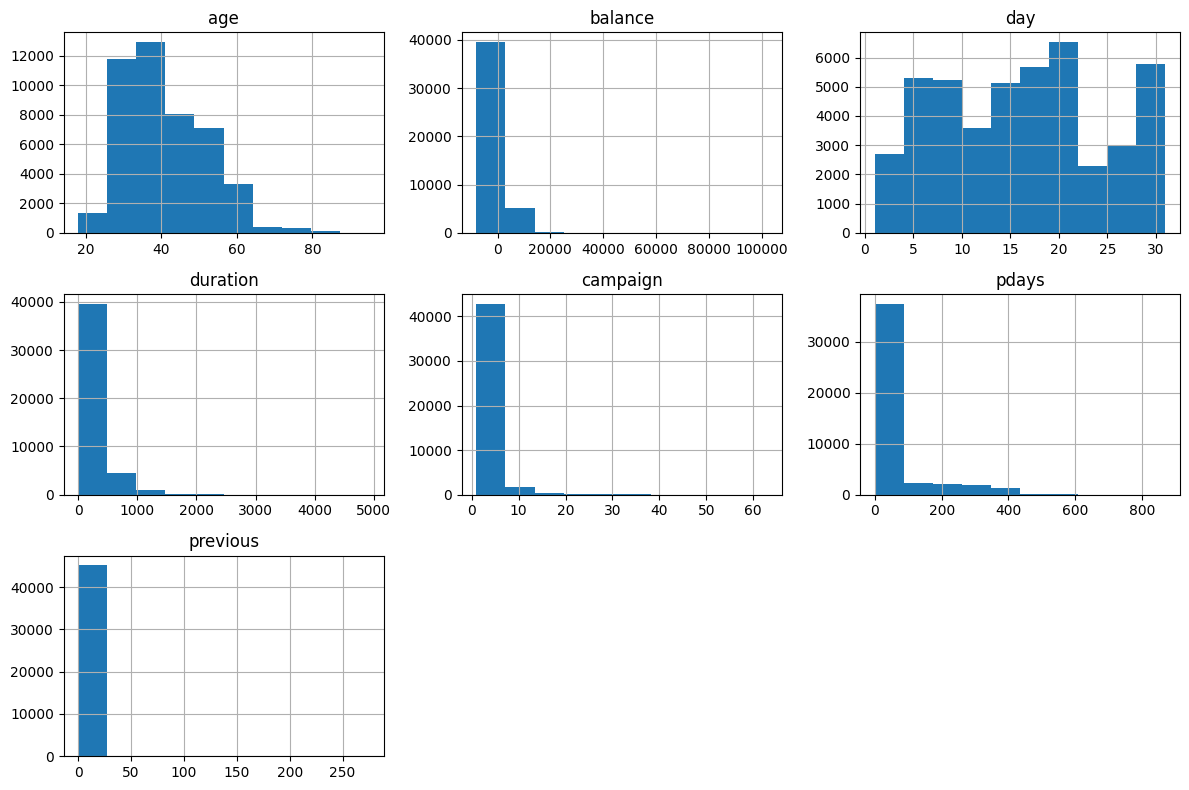

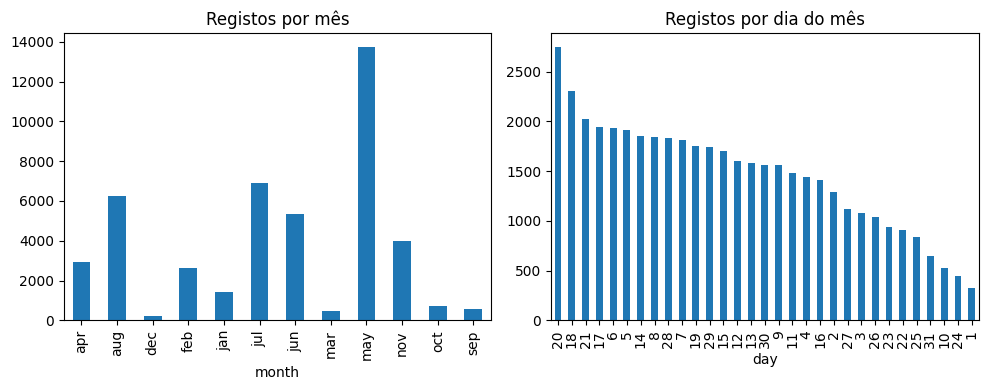

LogReg: AUC=0.899 | F1=0.518
RandomForest: AUC=0.919 | F1=0.477
XGB: AUC=0.927 | F1=0.520
Melhor modelo: XGB


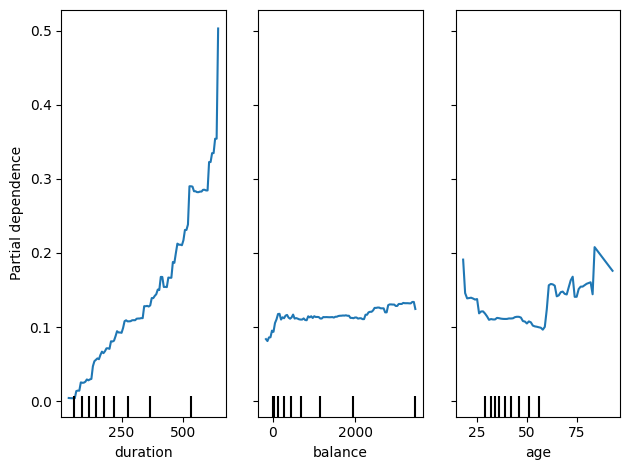

100%|===================| 6770/6782 [01:08<00:00]        

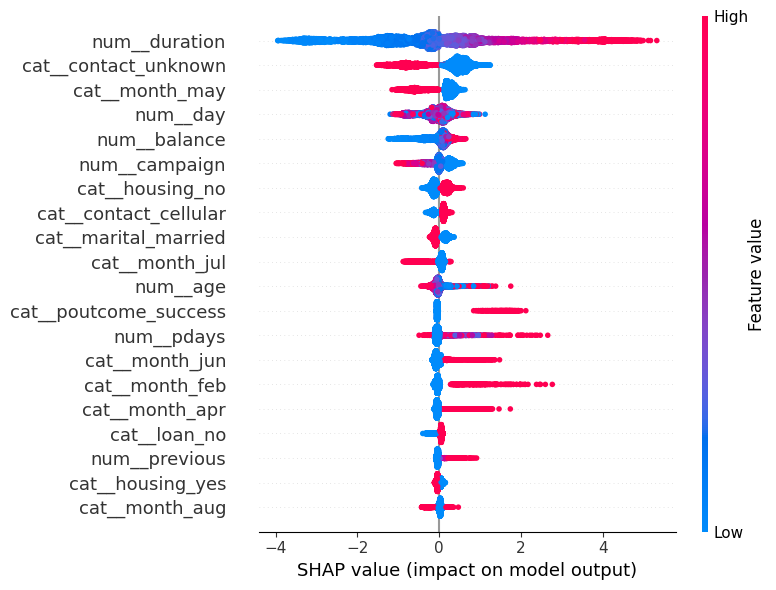

In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings, os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Descomentar para instalar as bibliotecas necessárias
#!pip install xgboost shap

warnings.filterwarnings('ignore')
try:
    from xgboost import XGBClassifier
except ImportError:
    XGBClassifier = None

# Carregar dataset local
DATA_PATH = r'C:\Users\HP\Desktop\Formação\Eisnt\UFCD 10808 - Limpeza e transformação de dados em Python\bank+marketing\bank-full.csv'
df = pd.read_csv(DATA_PATH, sep=';')
print(df.shape)
df.head()

#####################################################
#  1. Análise Exploratória (EDA)
#####################################################
# df.info()
display(df.describe(include='all').T.head(20))

# Histogramas numéricos
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Colunas temporais
fig, ax = plt.subplots(1,2, figsize=(10,4))
df['month'].value_counts().sort_index().plot(kind='bar', ax=ax[0], title='Registos por mês')
df['day'].value_counts().plot(kind='bar', ax=ax[1], title='Registos por dia do mês')
plt.tight_layout()
plt.show()


#####################################################
#  2. Pré‑processamento
#####################################################

df_clean = df.copy()

# Tratamento de outliers (IQR capping) para balance & duration
for col in ['balance','duration']:
    Q1, Q3 = df_clean[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    df_clean[col] = np.clip(df_clean[col], Q1-1.5*IQR, Q3+1.5*IQR)

# Imputações / ajustes
df_clean['pdays'].replace(999, -1, inplace=True)  # 999 significa não contactado
df_clean['poutcome'].fillna('unknown', inplace=True)

# Encoding ordinal opcional para education
ordinal_map = {'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,
               'high.school':4,'professional.course':5,'university.degree':6}
df_clean['education_ord'] = df_clean['education'].map(ordinal_map).fillna(3)

# Definir features
numeric_features = ['age','balance','day','duration','campaign','pdays','previous','education_ord']
categorical_features = ['job','marital','default','housing','loan','contact','month','poutcome']

preprocess = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X = df_clean[numeric_features + categorical_features]
y = df_clean['y'].map({'no':0,'yes':1})

# Split estratificado 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


#####################################################
#  3. Modelação
#####################################################

models = {
    'LogReg': LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
    'RandomForest': RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)
}
if XGBClassifier is not None:
    models['XGB'] = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=5,
                                  subsample=0.8, colsample_bytree=0.8, random_state=42,
                                  objective='binary:logistic', eval_metric='auc')

results = {}
for name, model in models.items():
    pipe = Pipeline([('prep', preprocess), ('clf', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]
    results[name] = {'roc_auc': roc_auc_score(y_test, y_proba),
                     'f1': f1_score(y_test, y_pred),
                     'model': pipe}
    print(f"{name}: AUC={results[name]['roc_auc']:.3f} | F1={results[name]['f1']:.3f}")
    

best_name = max(results, key=lambda k: results[k]['roc_auc'])
best_model = results[best_name]['model']
print('Melhor modelo:', best_name)

    
#####################################################
#  4. Interpretabilidade
#####################################################

from sklearn.inspection import PartialDependenceDisplay
features_pd = ['duration','balance','age']
PartialDependenceDisplay.from_estimator(best_model, X_val, features_pd)
plt.tight_layout()
plt.show()

# SHAP opcional
try:
    import shap
    explainer = shap.Explainer(best_model['clf'], best_model['prep'].transform(X_train),
                               feature_names=best_model['prep'].get_feature_names_out())
    shap_values = explainer(best_model['prep'].transform(X_val))
    shap.summary_plot(shap_values, feature_names=best_model['prep'].get_feature_names_out(), plot_size=(8,6))
except Exception as e:
    print('Para gráficos SHAP instale shap: pip install shap -- A ignorar ->', e)

    